# Phase Space Grid Beam Generator
This script generates 3 individual beams sampling
* real space
* x phase space
* y phase space

respectively in the shape of a regular grid.

## General Setup

### Imports and Settings

In [1]:
import numpy as np
from scipy import constants
import matplotlib.pyplot as plt
import os.path
%matplotlib inline

### Physical Constants

In [2]:
### Natural Constants in SI units
M_P = constants.proton_mass
Q_E = constants.elementary_charge
C = constants.speed_of_light

***
## Parameters (*User Input*)

### Grid Points

In [3]:
### Real Space Grid Points
rs_x = np.linspace(-10,10,21) # x in mm
rs_y = np.linspace(-10,10,21) # y in mm

### x Phase Space Grid Points
psx_x = np.linspace(-10,10,21) # x in mm
psx_xp = np.linspace(-10,10,21) # x' in mrad

### y Phase Space Grid Points
psy_y = np.linspace(-10,10,21) # y in mm
psy_yp = np.linspace(-10,10,21) # y' in mrad

### General Beam Parameters

In [4]:
### Particle Parameters
q = 6 * Q_E # particle charge in C
m = 12 * M_P # particle mass in kg
i_t = 1 # in A "trajectory current" expected by CST (for space charge)


### Beam parameters
u = 30000 # in V (acceleration potential)
e_kin = u * q # kinetic energy in J
z0 = 0.1 # z position of xy starting plane

### User Feedback
print('Particle Charge = ' + str(q) + ' kg = ' + str(q/Q_E) + ' m_p')
print('Particle Mass = ' + str(m) + ' kg = ' + str(m/M_P) + ' m_p')
print('Kinetic Energy = ' + str(e_kin) + ' J = ' + str(e_kin/Q_E) + ' eV')
print('Starting Position z0 = ' + str(z0) + ' m = ' + str(z0*1000) + ' mm')

Particle Charge = 9.613059724800001e-19 kg = 6.0 m_p
Particle Mass = 2.0071462776000003e-26 kg = 12.0 m_p
Kinetic Energy = 2.88391791744e-14 J = 180000.0 eV
Starting Position z0 = 0.1 m = 100.0 mm


***
## Convert Inputs

In [5]:
rs_x /= 1000 # to m 
rs_y /= 1000 # to m 
psx_x /= 1000 # to m 
psx_xp /= 1000 # to rad 
psy_y /= 1000 # to m 
psy_yp /= 1000 # to rad 

## Compute Momentum (CST Style)

In [6]:
e_tot = e_kin + m * C**2 # Relativistic total energy
# p0_si = np.sqrt(2*m*e_kin) # Non relativistic approximation
p0_si = 1/C * np.sqrt(e_tot**2 - (m * C**2)**2) # Relativistically correct momentum
p0_cst = p0_si / m / C # Absolute Momentum as used in CST (relativistic beta * gamma)

***
## Create Particle Definitions

### Real Space

In [7]:
### x and y coordinate list
o_rs_x, o_rs_y = np.meshgrid(rs_x, rs_y) # create x y grid
o_rs_x = o_rs_x.flatten() # flatten x grid
o_rs_y = o_rs_y.flatten() # flatten y grid

### remaining parameters
n = o_rs_x.size # get number of grid points
o_rs_z = z0 * np.ones(n) # z position
o_rs_px_cst = np.zeros(n) # x momentum (cst-style)
o_rs_py_cst = np.zeros(n) # y momentum (cst-style)
o_rs_pz_cst = p0_cst * np.ones(n) # z momentum (cst-style)
o_rs_m = m * np.ones(n) # mass
o_rs_q = q * np.ones(n) # charge
o_rs_i_t = i_t * np.ones(n) # trajectroy current

### Output Matrix
output_rs = np.column_stack([o_rs_x, o_rs_y, o_rs_z,
                           o_rs_px_cst, o_rs_py_cst, o_rs_pz_cst,
                           o_rs_m, o_rs_q, o_rs_i_t])

### x Phase Space

In [8]:
### x and x' coordinate list
o_psx_x, o_psx_xp = np.meshgrid(psx_x, psx_xp) # create x x' grid
o_psx_x = o_psx_x.flatten() # flatten x grid
o_psx_xp = o_psx_xp.flatten() # flatten x' grid

### compute momenta
o_psx_pz_cst = p0_cst / np.sqrt(1-np.tan(o_psx_xp)**2) # z momentum (cst-style)
o_psx_px_cst = o_psx_pz_cst * np.tan(o_psx_xp) # x momentum (cst-style)

### remaining parameters
n = o_psx_x.size # get number of grid points
o_psx_y = np.zeros(n) # z position
o_psx_z = z0 * np.ones(n) # z position
o_psx_py_cst = np.zeros(n) # y momentum (cst-style)
o_psx_m = m * np.ones(n) # mass
o_psx_q = q * np.ones(n) # charge
o_psx_i_t = i_t * np.ones(n) # trajectroy current

### Output Matrix
output_psx = np.column_stack([o_psx_x, o_psx_y, o_psx_z,
                           o_psx_px_cst, o_psx_py_cst, o_psx_pz_cst,
                           o_psx_m, o_psx_q, o_psx_i_t])

### y Phase Space

In [9]:
### y and y' coordinate list
o_psy_y, o_psy_yp = np.meshgrid(psy_y, psy_yp) # create x x' grid
o_psy_y = o_psy_y.flatten() # flatten x grid
o_psy_yp = o_psy_yp.flatten() # flatten x' grid

### compute momenta
o_psy_pz_cst = p0_cst / np.sqrt(1-np.tan(o_psy_yp)**2) # z momentum (cst-style)
o_psy_py_cst = o_psy_pz_cst * np.tan(o_psy_yp) # y momentum (cst-style)

### remaining parameters
n = o_psy_y.size # get number of grid points
o_psy_x = np.zeros(n) # z position
o_psy_z = z0 * np.ones(n) # z position
o_psy_px_cst = np.zeros(n) # x momentum (cst-style)
o_psy_m = m * np.ones(n) # mass
o_psy_q = q * np.ones(n) # charge
o_psy_i_t = i_t * np.ones(n) # trajectroy current

### Output Matrix
output_psy = np.column_stack([o_psy_x, o_psy_y, o_psy_z,
                           o_psy_px_cst, o_psy_py_cst, o_psy_pz_cst,
                           o_psy_m, o_psy_q, o_psy_i_t])

***
## Plots for a rough check

### Real Space

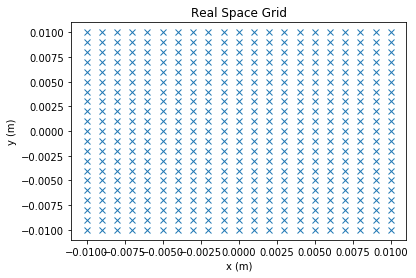

In [10]:
plt.plot(output_rs[:,0], output_rs[:,1],'x')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Real Space Grid')
plt.show()

### x Phase Space

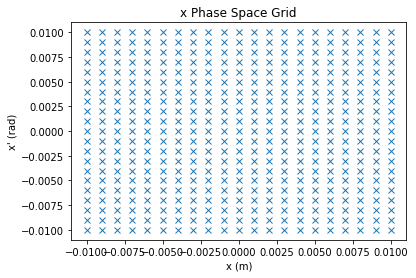

In [11]:
plt.plot(output_rs[:,0], np.arctan2(output_psx[:,3],output_psx[:,5]),'x')
plt.xlabel('x (m)')
plt.ylabel('x\' (rad)')
plt.title('x Phase Space Grid')
plt.show()

### y Phase Space

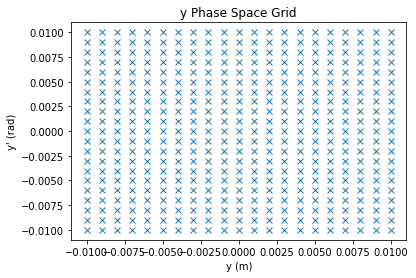

In [12]:
plt.plot(output_rs[:,0], np.arctan2(output_psy[:,4],output_psy[:,5]),'x')
plt.xlabel('y (m)')
plt.ylabel('y\' (rad)')
plt.title('y Phase Space Grid')
plt.show()

***
## File Export

In [13]:
### Filenames
rs_fname = 'realspace-beam.pid'
psx_fname = 'xphasespace-beam.pid'
psy_fname = 'yphasespace-beam.pid'

header_string = """--------------------------------------------------
SI units
The momentum (mom) is equivalent to beta * gamma.
--------------------------------------------------
Columns: pos_x  pos_y  pos_z  mom_x  mom_y  mom_z  mass  charge  current 
--------------------------------------------------
"""

### Save Real Space
if not os.path.isfile(rs_fname):
    rs_header = 'Real Space Grid Beam \n' + header_string
    np.savetxt(rs_fname, output_rs, delimiter=' ', fmt='%e', header = rs_header, comments='%')
    print(rs_fname + ' saved!')
else:
    print('Did not save, ' + rs_fname + ' already exists!')

### Save x Phase Space
if not os.path.isfile(psx_fname):
    psx_header = 'x Phase Space Grid Beam \n' + header_string
    np.savetxt(psx_fname, output_psx, delimiter=' ', fmt='%e', header = psx_header, comments='%')
    print(psy_fname + ' saved!')
else:
    print('Did not save, ' + psx_fname + ' already exists!')

### Save y Phase Space
if not os.path.isfile(psy_fname):
    psy_header = 'y Phase Space Grid Beam \n' + header_string
    np.savetxt(psy_fname, output_psy, delimiter=' ', fmt='%e', header = psy_header, comments='%')
    print(psy_fname + ' saved!')
else:
    print('Did not save, ' + psy_fname + ' already exists!')

realspace-beam.pid saved!
yphasespace-beam.pid saved!
yphasespace-beam.pid saved!


# EOF
***